Press 'q' to capture image and provide prediction.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


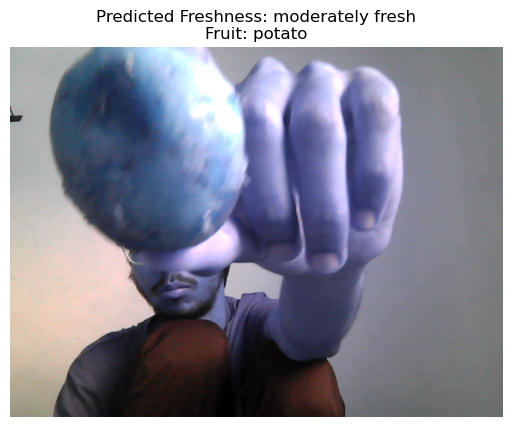

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

# Load the trained model
model_path = r"C:\Users\lenovo\Downloads\trained_modelF.h5"  # Replace with your model path
cnn = tf.keras.models.load_model(model_path)

# Manually define class names if automatic inference doesn't work
# Replace these with the actual class names in your dataset
manual_class_names = ["fresh_apple","fresh_banana","fresh_carrot","fresh_cucumber","fresh_potato","fresh_strawberry","moderately fresh_apple","moderately fresh_bananan","moderately fresh_carrot","moderately fresh_cucumber","moderately fresh_potato",
                      "moderately fresh_strawberry","spoiled_apple","spoiled_banana","spoiled_carrot","spoiled_cucumber","spoiled_potato","spoiled_strawberry","rotten_apple","rotten_banana","rotten_carrot""rotten_cucumber","rotten_potato","rotten_strrawberry"]

# Define webcam capture
cap = cv2.VideoCapture(0)  # 0 for the default webcam

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

print("Press 'q' to capture image and provide prediction.")

# Capture a single frame from webcam
ret, frame = cap.read()
if not ret:
    print("Failed to capture image. Exiting...")
    cap.release()
    exit()

# Resize frame to match the input size for the model (64x64)
frame_resized = cv2.resize(frame, (64, 64))

# Convert frame to RGB format
frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)

# Prepare the image for the model (convert to batch format)
input_arr = tf.keras.preprocessing.image.img_to_array(frame_rgb)
input_arr = np.expand_dims(input_arr, axis=0)  # Create a batch of 1 image

# Make prediction
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions[0])

# Retrieve the predicted class name from manual_class_names
predicted_category = manual_class_names[result_index]

# Try to extract metadata (fruit type, freshness category, and shelf life) from the class name
# Assuming class names are something like 'fresh_apple', 'rotten_banana', etc.
path_parts = predicted_category.split("_")  # Split by underscore for category extraction

# Safely extract information, ensuring no IndexError occurs
freshness_category = path_parts[0] if len(path_parts) > 0 else "Unknown Freshness"
fruit_info = path_parts[1] if len(path_parts) > 1 else "Unknown Fruit"

# Show the frame with the prediction using matplotlib
plt.imshow(frame)  # Display the captured frame
plt.title(f"Predicted Freshness: {freshness_category}\nFruit: {fruit_info}")
plt.axis("off")  # Turn off axes
plt.show()  # Show the plot with the prediction

# Release the webcam
cap.release()
